## Vision Systems in Agriculture (Part 1)

### Section 1: Image Representation (Images as Arrays)
We define how images are represented as arrays

#### 1.1 Import relevant Python packages

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### 1.2 Load and display an image

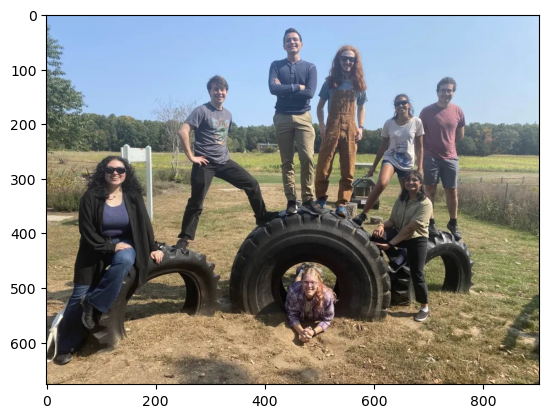

In [3]:
path_to_image = './img/class-crew.jpg'

# read the image from the directory
img = cv.imread(path_to_image)

# Convert from BGR (OpenCV's default) to RGB (Matplotlib's default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# display image
plt.imshow(img_rgb)
plt.show()

#### 1.3 Explore image properties

In [4]:
print('Image properties:')
print(f'Image type: {type(img_rgb)}')
print(f'Image shape: {img_rgb.shape}')
print(f'Image size: {img_rgb.size}')


Image properties:
Image type: <class 'numpy.ndarray'>
Image shape: (677, 903, 3)
Image size: 1833993


### Section 2: Basic Image Processing

1. Image cropping
2. Image resizing
3. Splitting image channels
4. Merging image channels
5. Converting to different color spaces
6. Pixel value distribution (image histogram)

1. Image cropping

Cropped image shape: (56, 45, 3)


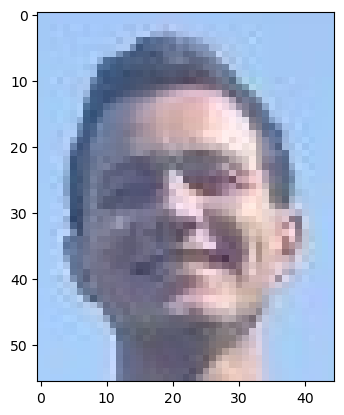

In [22]:
# TODO: Try to isolate Luke head!!

img_cropped = img_rgb[22:78, 430:475]
plt.imshow(img_cropped)
print(f'Cropped image shape: {img_cropped.shape}')

2. Resize image

Original image shape: (677, 903, 3)
Resized image shape: (200, 200, 3)


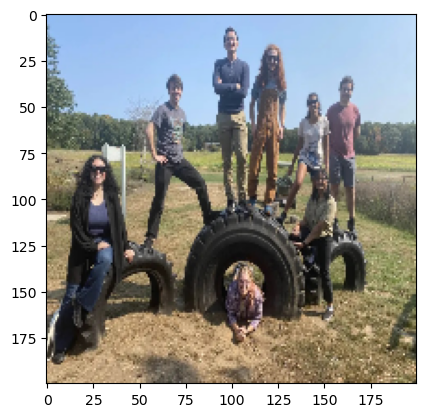

In [24]:
# TODO: Explore the cv.resize function

print(f'Original image shape: {img_rgb.shape}')
img_resize = cv.resize(img_rgb, (200, 200))
print(f'Resized image shape: {img_resize.shape}')

plt.imshow(img_resize)

3. Splitting the image channels

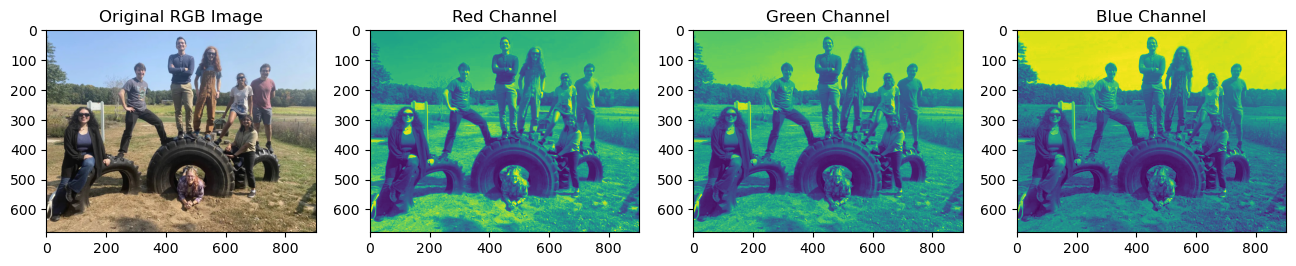

In [25]:
#TODO: RGB images have three (3) channels, use cv.split to isolate each channel and then display them all

channels = cv.split(img_rgb)
titles = ['Original RGB Image', 'Red Channel', 'Green Channel', 'Blue Channel']

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(channels)):
    plt.subplot(1,4,i+2)
    plt.imshow(channels[i])
    plt.title(titles[i+1])

plt.show()

4. Merging image channels

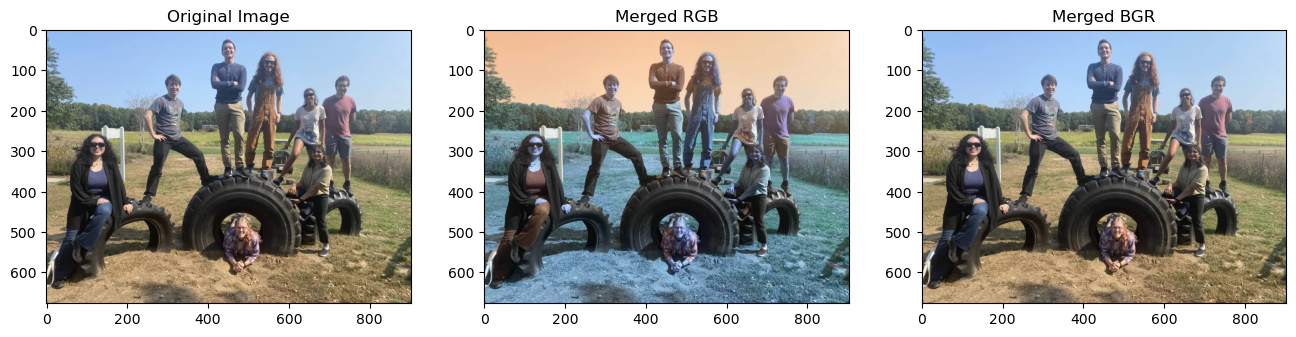

In [26]:
#TODO: What can be split can be merged. Use the cv.merge function to merge the individual channels together

b_channel, g_channel, r_channel = cv.split(img_rgb)

merged_img_rgb = cv.merge([r_channel, g_channel, b_channel])
merged_img_bgr = cv.merge([b_channel, g_channel, r_channel])

#TODO: Does the order of merging matter? Find out!

titles = ['Original Image', 'Merged RGB', 'Merged BGR']
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
plt.imshow(img_rgb), plt.title(titles[0])
plt.subplot(1,3,2)
plt.imshow(merged_img_rgb), plt.title(titles[1])
plt.subplot(1,3,3)
plt.imshow(merged_img_bgr), plt.title(titles[2])

plt.show()

5. Converting to different color spaces

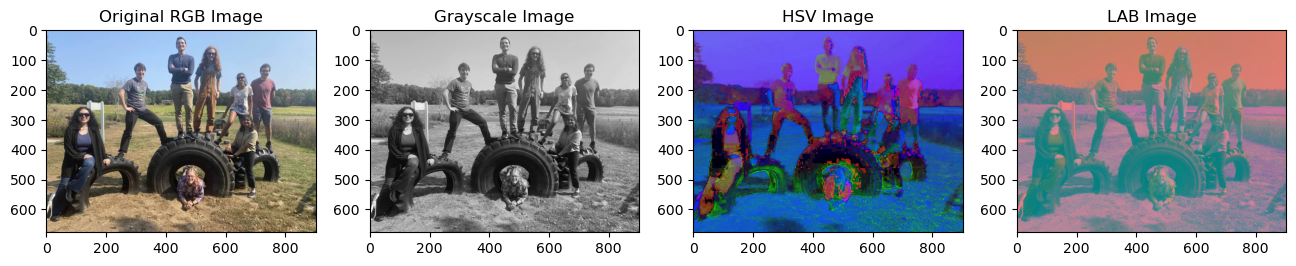

In [27]:
#TODO: Explore different color spaces. Plot the original image in at least 3 other color spaces

# Reference: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

# Convert the original image (in RGB) to other color spaces
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)   # Grayscale
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)     # HSV
img_lab = cv.cvtColor(img_rgb, cv.COLOR_RGB2LAB)     # LAB

# Set titles for the images
titles = ['Original RGB Image', 'Grayscale Image', 'HSV Image', 'LAB Image']

# Create a figure to display the original and the images in different color spaces
plt.figure(figsize=(16, 6))

# Display the original RGB image
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title(titles[0])

# Display the grayscale image
plt.subplot(1, 4, 2)
plt.imshow(img_gray, cmap='gray')  # Grayscale requires cmap='gray'
plt.title(titles[1])

# Display the HSV image
plt.subplot(1, 4, 3)
plt.imshow(img_hsv)
plt.title(titles[2])

# Display the LAB image
plt.subplot(1, 4, 4)
plt.imshow(img_lab)
plt.title(titles[3])

plt.show()

6. Pixel value distribution

Min and Max pixel values are: [0, 255]


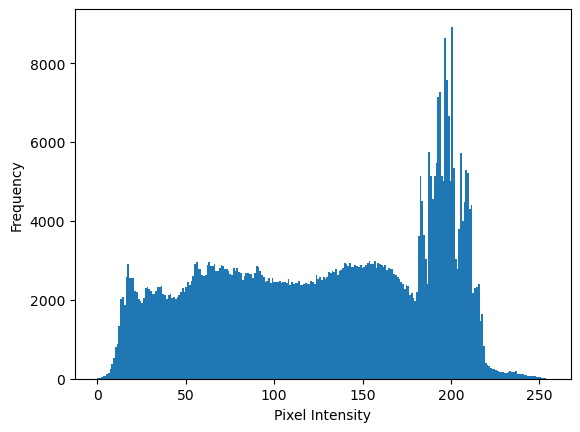

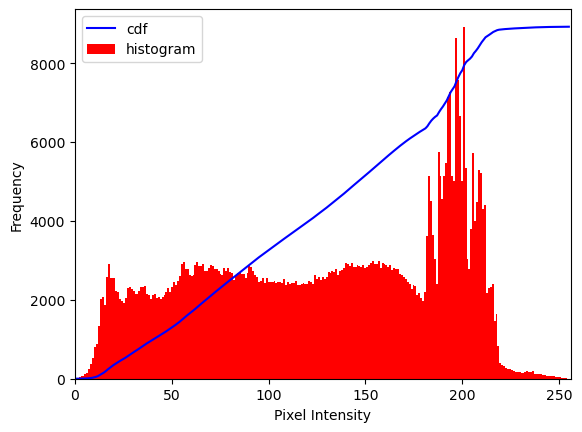

In [28]:
# TODO: Every pixel has a value (0, 255), let's explore the pixel value distribution

# TODO: 1. convert to grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# TODO: 2. find the min and max pixel value
min_val, max_val = np.min(img_gray), np.max(img_gray)
print(f'Min and Max pixel values are: [{min_val}, {max_val}]')

# TODO: 3. create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution
hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


### Section 3: Image Enhancement

1. Histogram equalization
2. Filtering

#### 1. Histogram equalization

Resource: https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

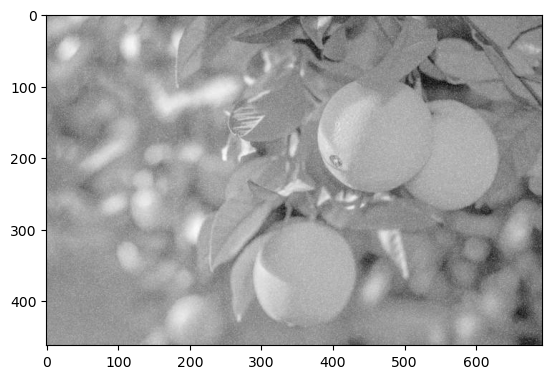

In [30]:
# import orange image file: 'orange.jpg'
img_gray = cv.imread('./img/noisy-oranges.jpg', cv.IMREAD_GRAYSCALE)

plt.imshow(img_gray, cmap='gray')
# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution


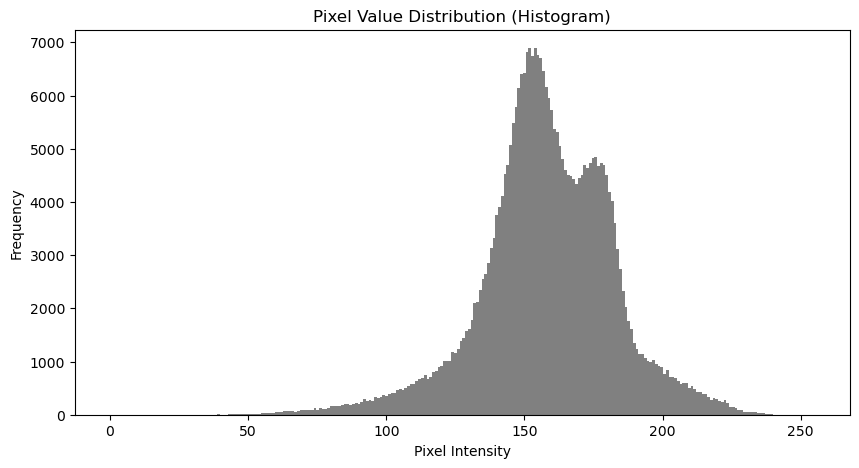

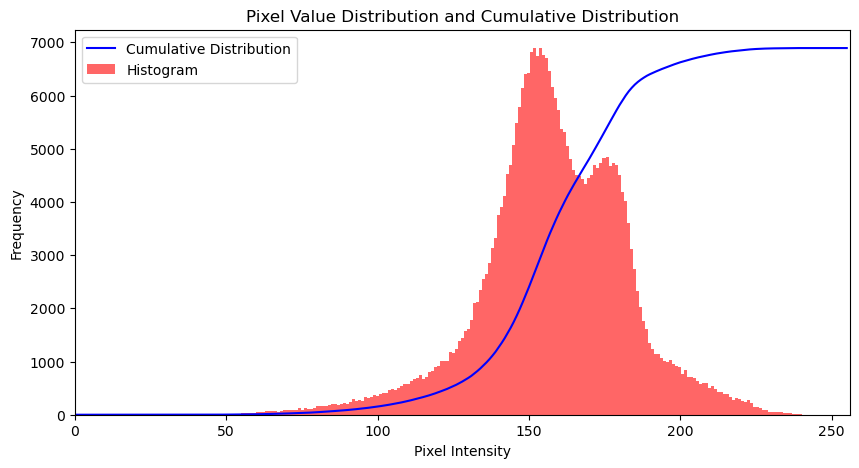

In [31]:
# TODO: Compute and plot the histogram and the cummulative distribution (use similar code as above)

# Step 1: Compute and plot the histogram
histSize = 256  # Number of bins
histRange = (0, 255)  # Range of pixel values

plt.figure(figsize=(10, 5))
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color='gray')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution (Histogram)')
plt.show()

# Step 2: Compute the cumulative distribution and plot it alongside the histogram
# Calculate the histogram
hist, bins = np.histogram(img_gray.flatten(), bins=histSize, range=histRange)

# Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot the cumulative distribution and histogram together
plt.figure(figsize=(10, 5))
plt.plot(cdf_normalized, color='blue', label='Cumulative Distribution')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=0.6, color='red', label='Histogram')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.title('Pixel Value Distribution and Cumulative Distribution')
plt.show()

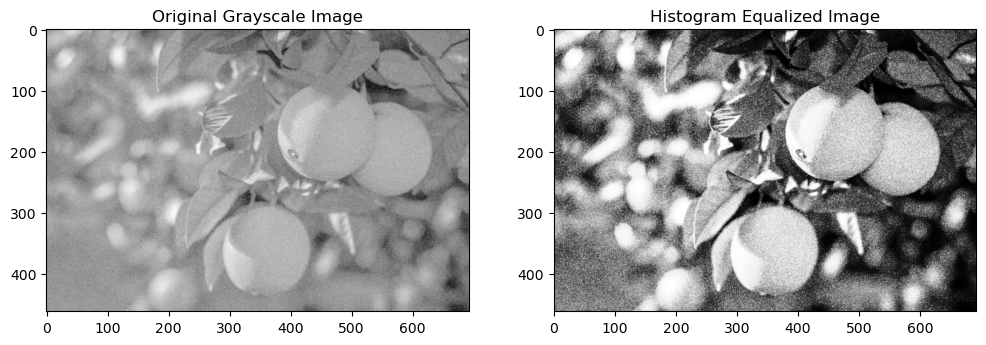

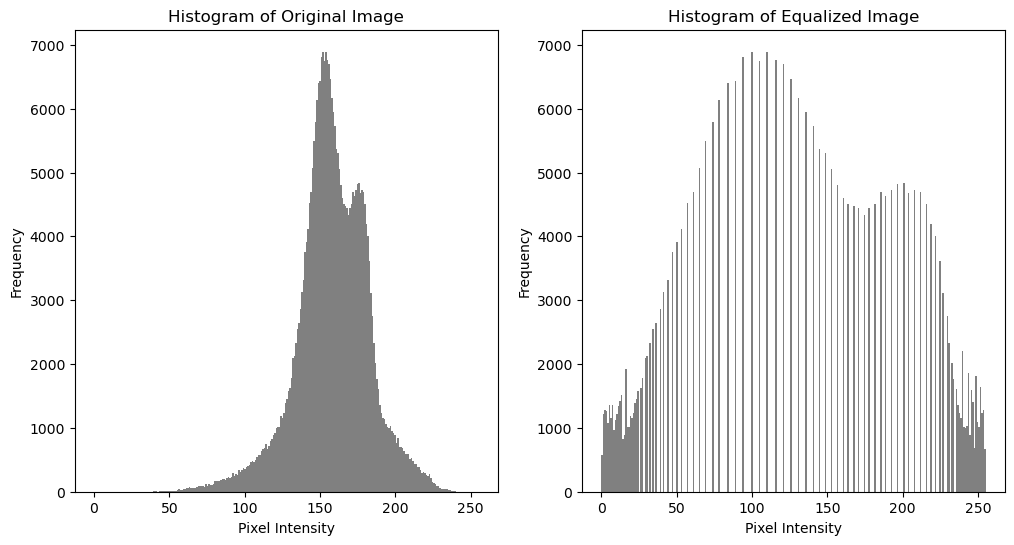

In [32]:
# TODO: Using the cv.equalizeHist, perform histogram equalization and plot the result

img_equalized = cv.equalizeHist(img_gray)

# Plot the original grayscale image and the equalized image side by side
plt.figure(figsize=(12, 6))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')

# Equalized grayscale image
plt.subplot(1, 2, 2)
plt.imshow(img_equalized, cmap='gray')
plt.title('Histogram Equalized Image')

plt.show()

# Compute and plot the histograms of the original and equalized images

# Plot histogram of original image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(img_gray.flatten(), bins=256, range=(0, 255), color='gray')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram of equalized image
plt.subplot(1, 2, 2)
plt.hist(img_equalized.flatten(), bins=256, range=(0, 255), color='gray')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

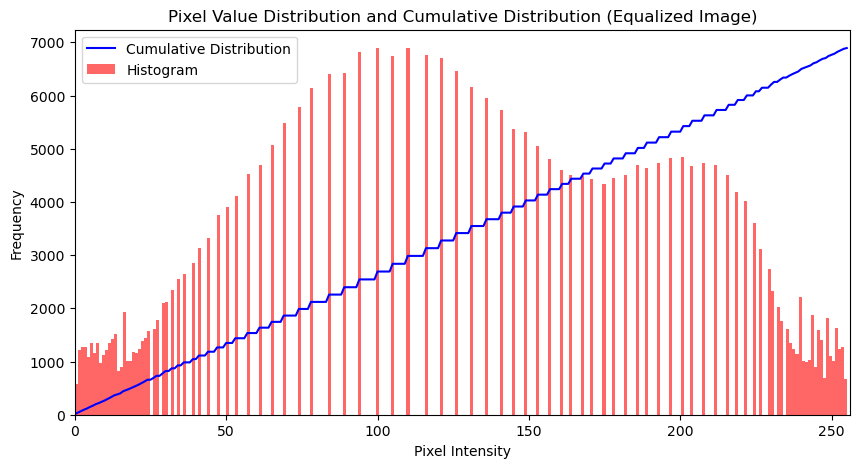

In [33]:
# TODO: Compute and plot the histogram and the cummulative distribution of the equalized image (use similar code as above)

# Step 1: Compute the histogram and cumulative distribution function (CDF)
hist_equalized, bins_equalized = np.histogram(img_equalized.flatten(), bins=256, range=(0, 255))

# Calculate the CDF for the equalized image
cdf_equalized = hist_equalized.cumsum()

# Normalize the CDF for plotting
cdf_equalized_normalized = cdf_equalized * float(hist_equalized.max()) / cdf_equalized.max()

# Step 2: Plot the histogram and cumulative distribution together
plt.figure(figsize=(10, 5))

# Plot cumulative distribution (CDF)
plt.plot(cdf_equalized_normalized, color='blue', label='Cumulative Distribution')

# Plot histogram
plt.hist(img_equalized.flatten(), bins=256, range=(0, 255), alpha=0.6, color='red', label='Histogram')

# Set limits and labels
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.title('Pixel Value Distribution and Cumulative Distribution (Equalized Image)')
plt.show()

# Can you spot the difference??

#### 2. Image Filtering (smoothing)


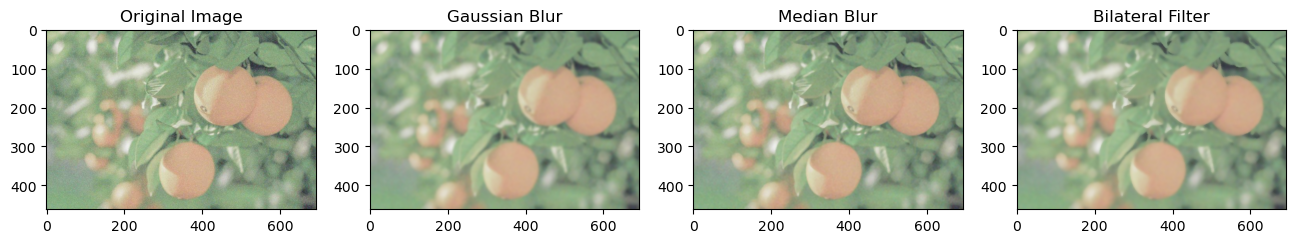

In [36]:
# Resource: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html 
img = cv.imread('./img/noisy-oranges.jpg')

# TODO: Play around with different filters to get a good outcome

# Gaussian Blur
gaussian_blur = cv.GaussianBlur(img, (15, 15), 0)

# Median Blur
median_blur = cv.medianBlur(img, 5)

# Apply Bilateral Filter
bilateral_filter = cv.bilateralFilter(img, 10, 100, 100)

# Plot the results for comparison
plt.figure(figsize=(16, 8))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# Gaussian Blur
plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(gaussian_blur, cv.COLOR_BGR2RGB))
plt.title('Gaussian Blur')

# Median Blur
plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(median_blur, cv.COLOR_BGR2RGB))
plt.title('Median Blur')

# Bilateral Filter
plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(bilateral_filter, cv.COLOR_BGR2RGB))
plt.title('Bilateral Filter')

plt.show()

### Section 4. Pixel-wise Image Segmentation

1. Monochrome image classification (manual approach)
2. Monochrome image classification (adaptive approach and Otsu)
3. Color image classification


1. Monochrome image classification (manual approach)

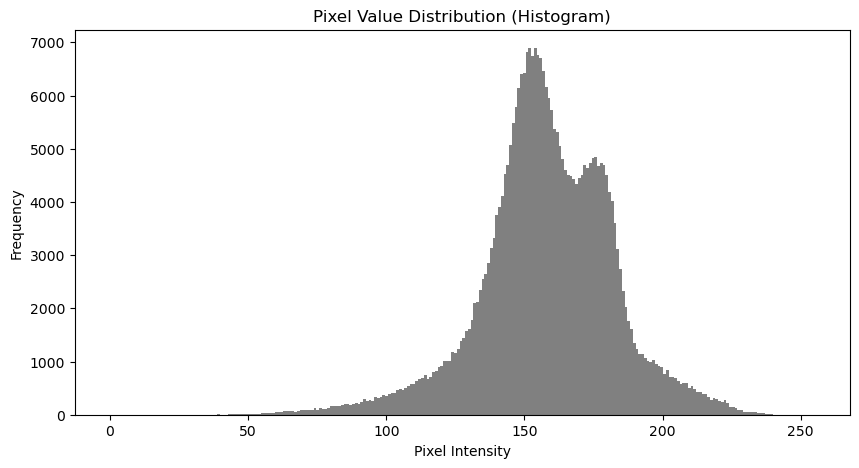

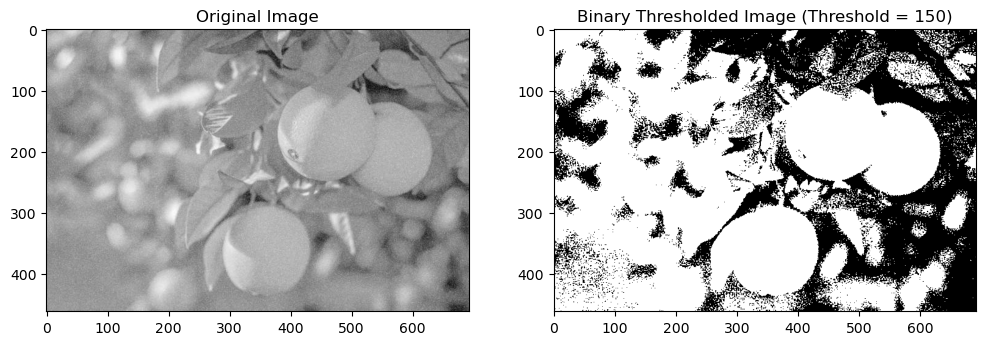

In [40]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Import orange.jpg 

# TODO: Inspect the pixel value distribution to determine a good threshold

# TODO: Use cv.threshold to apply a binary threshold on the image and plot the outcome 

# Step 1: Load the image
img = cv.imread('./img/noisy-oranges.jpg', cv.IMREAD_GRAYSCALE)

# Step 2: Plot the pixel value distribution (histogram)
plt.figure(figsize=(10, 5))
plt.hist(img.flatten(), bins=256, range=(0, 255), color='gray')
plt.title('Pixel Value Distribution (Histogram)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Step 3: Apply binary thresholding based on the pixel distribution
threshold_value = 150
_, thresholded_img = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY)

# Step 4: Plot the original and thresholded images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Thresholded Image
plt.subplot(1, 2, 2)
plt.imshow(thresholded_img, cmap='gray')
plt.title(f'Binary Thresholded Image (Threshold = {threshold_value})')

plt.show()

2. Monochrome image classification (adaptive approach and Otsu)

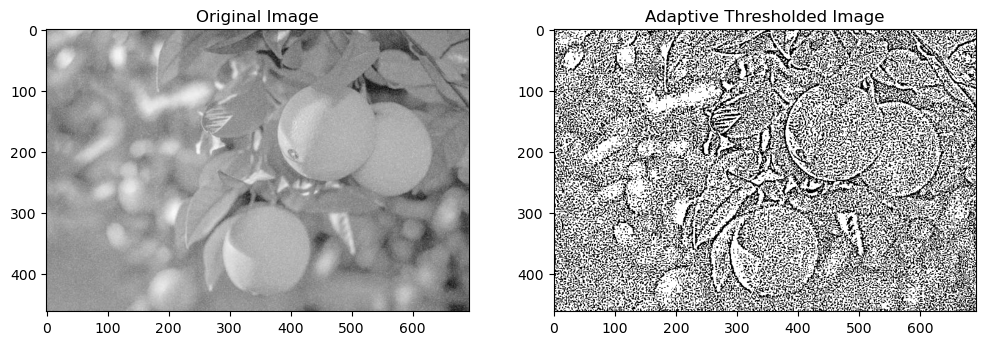

In [41]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use cv.adaptiveThreshold to apply a binary threshold on the image and plot the outcome

# Apply adaptive thresholding
adaptive_thresh = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# Plot the original and adaptive thresholded images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Adaptive Thresholded Image
plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholded Image')

plt.show()

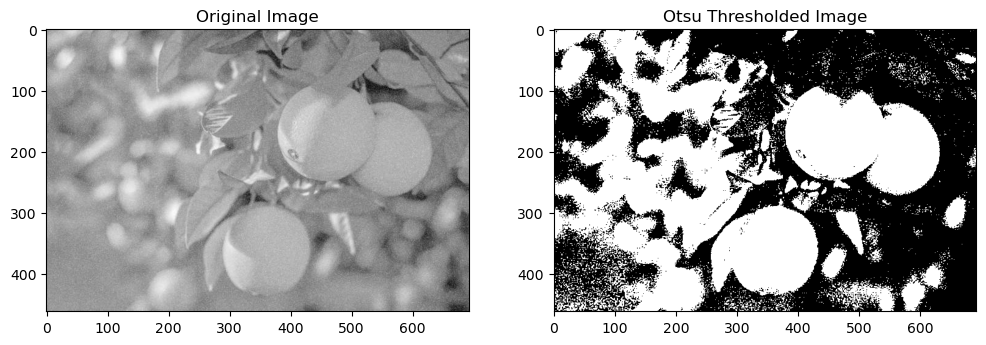

In [42]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use the otsu method to apply a binary threshold on the image and plot the outcome

# Apply Otsu's thresholding
_, otsu_thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Plot the original and Otsu thresholded images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Otsu Thresholded Image
plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Otsu Thresholded Image')

plt.show()

# TODO: What are your observations?

3. Color image classification

Resource: https://realpython.com/python-opencv-color-spaces/ 

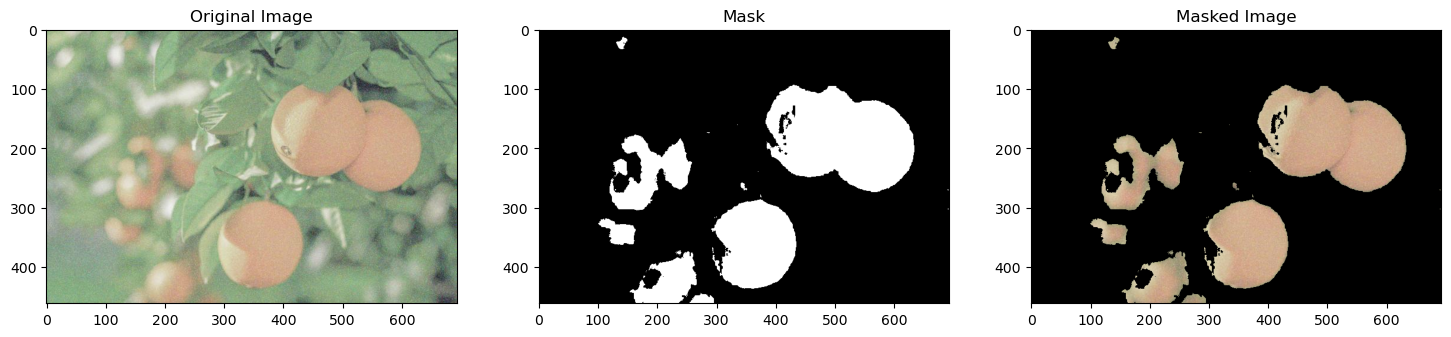

In [45]:
# TODO: Follow the resource above to define a color mask

img = cv.imread('./img/noisy-oranges.jpg')

# Convert the image from BGR to HSV
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the color range for orange
lower_orange = np.array([5, 50, 50])
upper_orange = np.array([30, 255, 255])

# Create a mask
mask = cv.inRange(hsv_img, lower_orange, upper_orange)

# Apply the mask to the original image
masked_img = cv.bitwise_and(img, img, mask=mask)

# Plot the original image, the mask, and the masked result
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(masked_img, cv.COLOR_BGR2RGB))
plt.title('Masked Image')

plt.show()

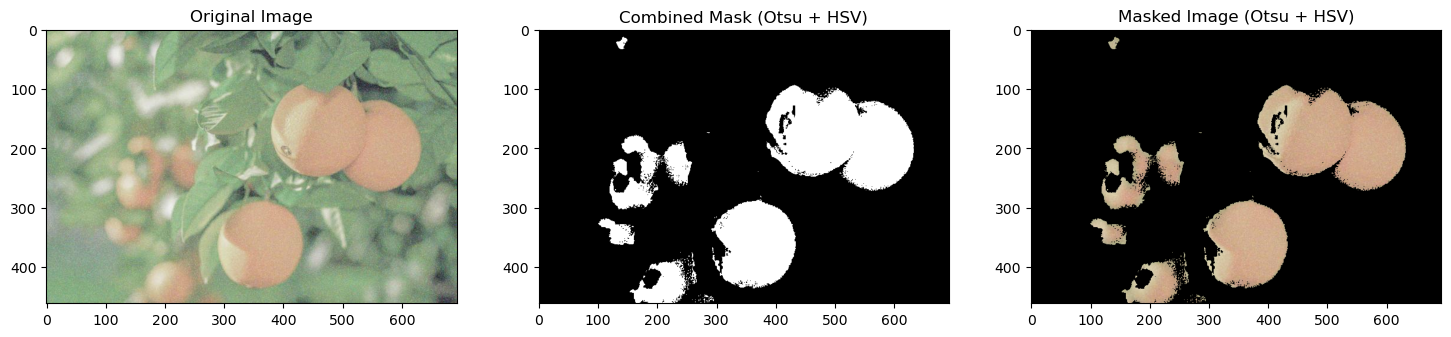

In [46]:
# TODO: Could you apply the Otsu approach to this as well? Give it a try.

# Convert the original image to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, otsu_thresh = cv.threshold(gray_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Apply the HSV mask (already computed)
# Mask for the orange color
hsv_mask = cv.inRange(hsv_img, lower_orange, upper_orange)

# Combine Otsu's threshold and HSV mask using bitwise AND
combined_mask = cv.bitwise_and(otsu_thresh, hsv_mask)

# Apply the combined mask to the original image
combined_result = cv.bitwise_and(img, img, mask=combined_mask)

# Plot the original image, the combined mask, and the masked result
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# Combined Mask (Otsu + HSV)
plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Mask (Otsu + HSV)')

# Masked Image after applying combined mask
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(combined_result, cv.COLOR_BGR2RGB))
plt.title('Masked Image (Otsu + HSV)')

plt.show()

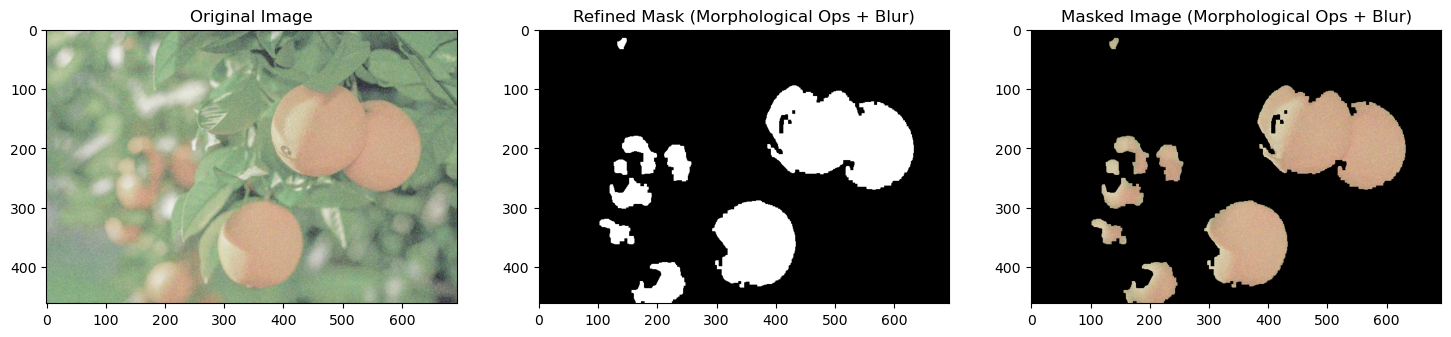

In [47]:
# TODO: Morphological operations are super helpful in denoising and rounding out your mask.
# Resource: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

# Load the image
img = cv.imread('./img/noisy-oranges.jpg')

# Convert the image from BGR to HSV
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Adjust the color range for orange
lower_orange = np.array([10, 50, 50])  # Tweak the HSV values as needed
upper_orange = np.array([30, 255, 255])

# Apply Gaussian blur before applying the mask
blurred_hsv_img = cv.GaussianBlur(hsv_img, (5, 5), 0)

# Create a mask with the adjusted HSV values
hsv_mask = cv.inRange(blurred_hsv_img, lower_orange, upper_orange)

# Convert the original image to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, otsu_thresh = cv.threshold(gray_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Combine Otsu's threshold and HSV mask using bitwise AND
combined_mask = cv.bitwise_and(otsu_thresh, hsv_mask)

# Define a kernel size for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply morphological operations (opening and closing)
morph_mask = cv.morphologyEx(combined_mask, cv.MORPH_OPEN, kernel)
morph_mask = cv.morphologyEx(morph_mask, cv.MORPH_CLOSE, kernel)

# Apply the refined mask to the original image
morph_result = cv.bitwise_and(img, img, mask=morph_mask)

# Plot the original image, the refined mask, and the masked result
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# Refined Mask (with Morphological Operations)
plt.subplot(1, 3, 2)
plt.imshow(morph_mask, cmap='gray')
plt.title('Refined Mask (Morphological Ops + Blur)')

# Masked Image after applying refined mask
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(morph_result, cv.COLOR_BGR2RGB))
plt.title('Masked Image (Morphological Ops + Blur)')

plt.show()

4. Bounding box and segmentation visualization

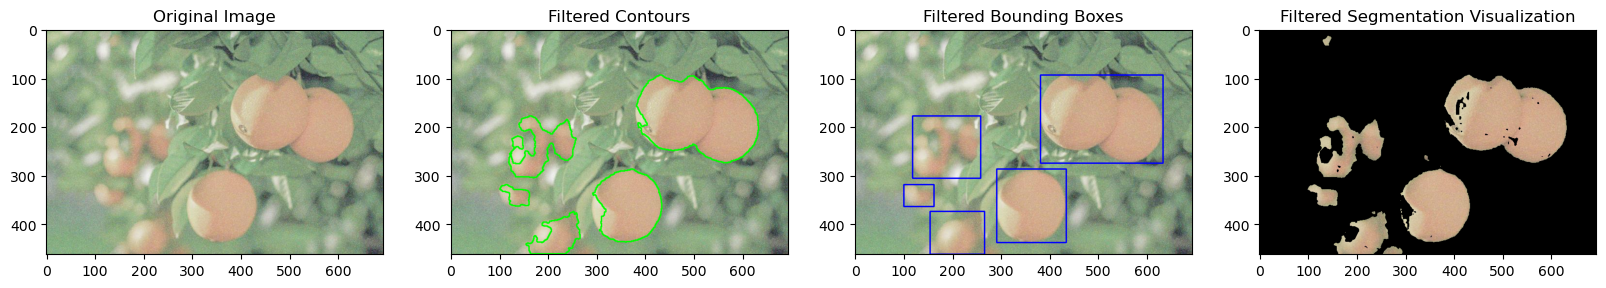

In [55]:
# TODO: Use a combination of cv.findContours, cv.drawContours and OpenCV's bitwise operations to obtain a bounding box and segmentation visualization as in the image below.

# Load the image
img = cv.imread('./img/noisy-oranges.jpg')

# Convert the image from BGR to HSV
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the color range for the orange
lower_orange = np.array([10, 50, 50])
upper_orange = np.array([30, 255, 255])

# Apply Gaussian blur to reduce noise
blurred_hsv_img = cv.GaussianBlur(hsv_img, (5, 5), 0)

# Create a mask based on the HSV range
hsv_mask = cv.inRange(blurred_hsv_img, lower_orange, upper_orange)

# Find contours on the HSV mask
contours, hierarchy = cv.findContours(hsv_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Define a minimum contour area to filter out small contours
min_contour_area = 500

# Filter out small contours
filtered_contours = [contour for contour in contours if cv.contourArea(contour) > min_contour_area]

# Draw the filtered contours on a copy of the original image
filtered_contour_img = img.copy()
cv.drawContours(filtered_contour_img, filtered_contours, -1, (0, 255, 0), 2)

# Draw bounding boxes for the filtered contours
filtered_bounding_box_img = img.copy()

for contour in filtered_contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(filtered_bounding_box_img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Apply the refined mask to the original image for segmentation visualization
filtered_segmentation_result = cv.bitwise_and(img, img, mask=hsv_mask)

# Plot the results with filtered contours
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# Filtered Contours drawn on the image
plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(filtered_contour_img, cv.COLOR_BGR2RGB))
plt.title('Filtered Contours')

# Bounding boxes of filtered contours
plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(filtered_bounding_box_img, cv.COLOR_BGR2RGB))
plt.title('Filtered Bounding Boxes')

# Segmentation Result with filtered contours
plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(filtered_segmentation_result, cv.COLOR_BGR2RGB))
plt.title('Filtered Segmentation Visualization')

plt.show()

## Example Solution

<img src=".\img\solution1.png" width="800">

<img src=".\img\solution2.png" width="400">


#### TODO
1. Generate an object detection solution for "orange.jpg" AND either "orange-2.jpg" or "orange-3.jpg" 
2. Generate a plot showing the prediction vs the ground truth for each image
3. Calculate the evaluation metric (mean average precision) for each image

In [63]:
from helpers import get_ground_truth_ann, calculate_map

# Step 1: Load the image
image_name = 'orange'
img = cv.imread(f'./img/{image_name}.jpg')

# Step 2: Convert the image from BGR to HSV for color segmentation
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lower_orange = np.array([10, 50, 50]) 
upper_orange = np.array([30, 255, 255])
hsv_mask = cv.inRange(hsv_img, lower_orange, upper_orange)

# Step 3: Find contours on the HSV mask
contours, _ = cv.findContours(hsv_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Step 4: Use cv.boundingRect to get the bounding box info from the contours
prediction_bbox = []
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    prediction_bbox.append([x, y, x + w, y + h])

# Step 5: Extract the ground truth bounding box for the image using the helper function
ground_truth_bbox = get_ground_truth_ann(image_name=image_name, show=False)

# Print ground truth and predicted bounding boxes
print(f'Ground truth bounding boxes: {ground_truth_bbox}')
print(f'Predicted bounding boxes: {prediction_bbox}')

# Step 6: Plot the ground truth (green) and predicted bounding boxes (blue) on the image
img_bbox = img.copy()

# Plot ground truth bounding boxes (green)
for gt in ground_truth_bbox:
    gt = [int(v) for v in gt]
    cv.rectangle(img_bbox, (gt[0], gt[1]), (gt[2], gt[3]), (0, 255, 0), 2)

# Plot predicted bounding boxes (blue)
for pd in prediction_bbox:
    pd = [int(v) for v in pd]
    cv.rectangle(img_bbox, (pd[0], pd[1]), (pd[2], pd[3]), (255, 0, 0), 2)

# Show the image with bounding boxes
plt.imshow(cv.cvtColor(img_bbox, cv.COLOR_BGR2RGB))
plt.title(f"Ground Truth vs Predicted Bounding Boxes for {image_name}.jpg")
plt.show()

# Step 7: Evaluate the prediction with mean Average Precision (mAP)
map_value = calculate_map(ground_truth_bbox, prediction_bbox)
print(f'mAP for {image_name}.jpg: {map_value}')


loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '.\\coco-annotations\\orange_annotation.json'

In [ ]:
# TODO: Use the calculate_map helper function to calculate the average precision of your object detection pipeline
# mAP = calculate_map(ground_truth_bbox, prediction_bbox, iou_threshold=0.7)
# print(mAP)